In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))

In [2]:
setwd("../../../../knockoff/DataAndCode/")

In [3]:
load(file='wildhigh_long.Rata')
load(file='dclpahigh_long.Rata')
load(file='dclpbhigh_long.Rata')
load(file='dnakhigh_long.Rata')
load(file='dlonhigh_long.Rata')

In [76]:
wt_genes <- read.table("wt_genes_1.txt",header=TRUE)
dlon_genes <- read.table("dlon_genes_1.txt",header=TRUE)
dkj_genes <- read.table("dnak_genes_1.txt",header=TRUE)
dclpa_genes <- read.table("dclpa_genes_1.txt",header=TRUE)
dclpb_genes <- read.table("dclpb_genes_1.txt",header=TRUE)

In [71]:
nrow(wt_genes)

[1] 20

In [73]:
nrow(dkj_genes)

[1] 38

In [77]:
fd <- c(wt_genes$locus_tag,dlon_genes$locus_tag,dkj_genes$locus_tag,dclpa_genes$locus_tag,dclpb_genes$locus_tag)

In [78]:
length(fd)

[1] 174

In [63]:
df1 <- read.table("../../dlon-tnseq/reports/Master Table/RESULTS_FDR_LASTLEVELONLY_v2.TAB",header=TRUE)%>%filter(locus_tag %in% fd)%>%select(strain,condition,Median_UC,locus_tag)%>%mutate(gene=locus_tag)
gene <- read.csv("../../PNAS/DATA//CCNA_ref.csv",header=TRUE,fill=TRUE)
head(gene)

,locus_tag,cc_tag,geneID,protein_id,description
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCNA_00001,CC_0001,NA,YP_002515376.1,ATP/GTP-binding protein
2,CCNA_00002,CC_0002,NA,YP_002515377.1,septum formation protein Maf
3,CCNA_00003,CC_0003,NA,YP_002515378.1,shikimate 5-dehydrogenase
4,CCNA_00004,CC_0004,NA,YP_002515379.1,dephospho-CoA kinase
5,CCNA_00005,CC_0005,dnaQ,NA,NA
6,CCNA_00006,CC_0006,NA,YP_002515381.1,enoyl-CoA hydratase


In [11]:
unique(df1$strain)

[1] "DCLPA"     "DCLPB"     "DLON"      "dnak-dnaJ" "wild-type"

In [46]:
df1$locus_tag[1]

[1] "CCNA_00001"

In [64]:
options(repr.plot.width=5, repr.plot.height=5)
cols <- c("wild-type" = "blue", "dnak-dnaJ"="red","DCLPA"="yellow","DCLPB"="orange","DLON"="darkgreen")
suppressWarnings(suppressMessages(plots <- df1%>%group_by(locus_tag)%>%group_map(~  ggplot(.)+aes(
    x=condition, y=Median_UC, fill=strain) + 
    geom_boxplot(width=0.6,position=position_dodge(1))+ggpubr::theme_classic2()+                                                                           
            scale_fill_manual(values = cols) +ggpubr::theme_classic2()+scale_fill_manual(values = cols) +
                        ggpubr::theme_classic2()+xlab("Stress")+ylab("Unique counts across all stress levels")+
theme(plot.title = element_text(size = 15, face = "bold"))+ggtitle(paste(.$gene,"distribution",sep=" ")))))
                                                                            

In [66]:
length(plots)

[1] 146

In [68]:
suppressMessages(library(gridExtra))
plots1 <- marrangeGrob(plots, nrow = 3, ncol = 3)

ggsave("multipage.pdf", plots1, width = 15, height = 15, units = "in")

Warning message:
"package 'gridExtra' was built under R version 4.2.1"


In [56]:
plot_df <- df1%>%filter(locus_tag=="CCNA_00708")%>%filter(strain=="wild-type"|strain=="dnak-dnaJ")%>%select(strain,condition,Median_UC)

In [61]:
p <- ggplot(plot_df, aes(x=condition, y=Median_UC, fill=strain)) +geom_boxplot(width=0.6,position=position_dodge(1))+ggpubr::theme_classic2()+ggtitle("CCNA_00708")+
scale_fill_manual(values = c("wild-type"="blue","dnak-dnaJ"="red"), name = "Strain")+xlab("Stress")+ylab("Unique counts across all stress levels")


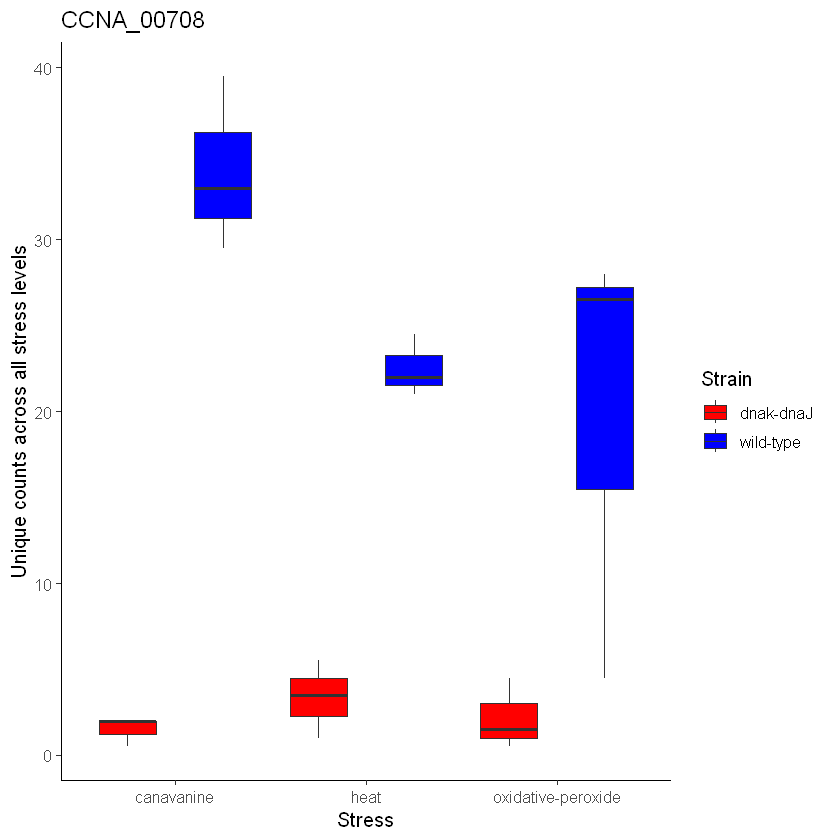

In [62]:
p

In [63]:
ggsave(filename = "../../PNAS//FIGURES/Suppl Fig/CCNA_00708.jpeg", device = "jpeg",  plot = p, width = 10, height = 7.5, dpi = 600, units = "in")